# AI-Powered Marketing Programme
## A Program by IIM Calcutta and TalentSprint
### Assignment : Bag of words


## Learning Objectives

   
  At the end of the experiment, you will be able to understand:
    
  * Bag of words
  * TF-IDF transformer
  * Sentiment Analysis

### Dataset Description



The restaurent reviews dataset consist of 2 attributes and 1000 entries for those attributes and they are:

1. Review: Review's of customer about food and service.
2. Liked: 0 or 1 for liked and disliked

### Task

We are taking the restaurant reviews dataset which contains information of reviews given by customers such as "Wow...Loved this place" or "crust is not good" and many more. Also, whether the customer liked the food and service or not. The objective is to build a model using Random Forest Classifier and evaluate the model that classifies the reviews of customers and also detect top emotions.

## Information

### Bag of Words (BoW)

* The Bag of Words is a collection of words to represent a document with word count and mostly disregarding the order in which they appear. Here, we look at the histogram of the words within the text, i.e. considering each word count as a feature.

* Also, the bag-of-words is a simple way to understand the representation of documents and words. It makes use of the one-hot vector representation (which returns a sparse matrix), where it is used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0's in all cells with the exception of a single 1 in a cell used uniquely to identify the word and the document is represented as a sum of one-hot vectors of all the words in the document.

* Here, the frequency of occurrence of each word in the defined vocabulary is represented in a vector form (1-Dimensional array). These vectors (features) can be used for training machine learning algorithms.

### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "P21L01E_test " #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9809876540" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
from warnings import filterwarnings
filterwarnings('ignore')

ipython = get_ipython()
  
notebook= "bow_wc_and_sentiments" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch") 

    ipython.magic("sx wget !wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Restaurant_Reviews.tsv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully



### Import required libraries and packages

In [ ]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_recall_curve, plot_roc_curve
from sklearn.metrics import classification_report

NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon (see link below) and the NLTK library's WordNet synonym sets. To know more about NRCLex, click [here](https://pypi.org/project/NRCLex/).

In [ ]:
!pip install NRCLex

     |████████████████████████████████| 396 kB 5.1 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43328 sha256=663335988f549915f17ad997b0dfb220d23dec7676f3a64bd9318b55bd4e61d6
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


Downloading 'stopwords' and 'punkt'(Sentence Tokenizer) from nltk package.

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

**Stemming**: It is the process of reducing the word to its word stem that affixes -> suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’. Stemming is important in natural language processing(NLP). Let us have a glance at two types of stemmer:

1. **Porter Stemmer**: It is one of the most popular stemming methods proposed in 1980. It is based on the idea that the suffixes in the English language are made up of a combination of smaller and simpler suffixes. This stemmer is known for its speed and simplicity. The main applications of Porter Stemmer include data mining and information retrieval. However, its applications are only limited to English words. Also, the group of stems is mapped on to the same stem and the output stem is not necessarily a meaningful word. The algorithms are fairly lengthy in nature and are known to be the oldest stemmer.

2. **Snow Ball Stemmer**: When compared to the Porter Stemmer, the Snowball Stemmer can map non-English words too. Since it supports other languages the Snowball Stemmers can be called a multi-lingual stemmer. The Snowball stemmers are also imported from the nltk package. This stemmer is based on a programming language called ‘Snowball’ that processes small strings and is the most widely used stemmer. The Snowball stemmer is way more aggressive than Porter Stemmer and is also referred to as Porter2 Stemmer. Because of the improvements added when compared to the Porter Stemmer, the Snowball stemmer is having greater computational speed. 

**Example**:

**Word**     $\space\space\space\space\space\space\space\space\space\space$    **Stem**

cared      $\space\space\space\space\space\space$ ->   care

university  $\space$  -> univers

fairly     $\space\space\space\space\space\space\space\space$ ->   fair

easily   $\space\space\space\space\space\space$    ->   easili

singing    $\space\space\space\space\space$  ->  sing

sings    $\space\space\space\space\space\space\space\space$    ->  sing

sung    $\space\space\space\space\space\space\space\space$     ->  sung

singer  $\space\space\space\space\space\space$    ->   singer

sportingly $\space\space$ ->   sport



Now, let us create the instances for PorterStemmer and SnowballStemmer from nltk package.

In [ ]:
ps = PorterStemmer()
sb = SnowballStemmer('english')

The below function is a text converter where we are removing the numbers, punctuations in string, stop words, white spaces, and stem.

In [ ]:
def text_converter(x):
    
    #Remove numbers
    rm_number_pattern = r'[0-9]'
    string_without_numbers = re.sub(rm_number_pattern, '', x)
    
    # Removing punctuations in string
    string_without_numbers_punc = re.sub(r'[^\w\s]', '', string_without_numbers)
    
    # Removing stop words, strip white spaces and stem
    sentence = string_without_numbers_punc.lower()
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [sb.stem(w) for w in word_tokens if not (w.lower() in stop_words and w != ' ')]
    
    return ' '.join(filtered_sentence)

In [ ]:
text_converter('St1, 23ring123ing.   f ')

'st ring f'

### Loading the dataset

In [ ]:
reviews_data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', converters={'Review':text_converter})

Finding the unique values of liked column from the reviews_data.

In [ ]:
np.unique(reviews_data.Liked.values)

array([0, 1])

#### Importing CountVectorizer from scikit learn

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. The value of each cell is nothing but the count of the word in that particular text sample.

In [ ]:
# Bag of words
count_vect = CountVectorizer()

# Fitting anf transforming the data
X_counts = count_vect.fit_transform(reviews_data.Review.values)
y = reviews_data.Liked.values

#### TF-IDF Transformer

Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. This is a common term weighting scheme in information retrieval, that has also found good use in document classification.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus. 

**Interpretation of TF-IDF**

Larger value of word suggests more important that word is in the document. E.g, The word “Cuisine” has got more weightage 0.538 then word “pizza” 0.4480. If we include stopwords like is, an, the which is very frequent in any documents they will get very less weightage.

To know more about TF-IDF transformer, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
# Using Tfidf Transformer to fit and transform X_counts
tf_transformer = TfidfTransformer(use_idf=False).fit(X_counts)
X_train_tf = tf_transformer.transform(X_counts)

Splitting the data into training and test set.

In [ ]:
# Splitting the dataset using "test_size = 0.33" into 67:33 ratio with 67% data as training data and 33% data as test data 
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.33, random_state=42)

#### Random Forest Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "***Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.***" Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

In [ ]:
Rf_clf = RandomForestClassifier(max_depth=2, random_state=42)

Fitting the training data to the model.

In [ ]:
Rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_test_pred = Rf_clf.predict(X_test)

Let us have a glance at the confusion matrix to get the True Positive, True Negative, False Positive, and False Negative values.

The confusion matrix is a table that is used to estimate the performance of a model. It tabulates the actual values and the predicted values in a n×n matrix for binary classification.

**True Positive**: This denotes all of those records where the actual values are true and the predicted values are also true. So, these denote all of the true positives. 

**False Negative**: This denotes all of those records where the actual values are true, but the predicted values are false. 

**False Positive**: In this, the actual values are false, but the predicted values are true. 

**True Negative**: Here, the actual values are false and the predicted values are also false. So, if you want to get the correct values, then correct values would basically represent all of the true positives and the true negatives. This is how the confusion matrix works.

In [ ]:
confusion_matrix(y_test_pred, y_test)

array([[ 47,   9],
       [126, 148]])

F1 score helps us calculate the harmonic mean of precision and recall that gives us the test’s accuracy. If F1 = 1, then precision and recall are accurate. If F1 < 1 or equal to 0, then precision or recall is less accurate, or they are completely inaccurate. 

In [ ]:
f1_score(y_test_pred, y_test)

0.6867749419953596

Using accuracy score we are calculating the accuracy of the model.


In [ ]:
accuracy_score(y_test_pred, y_test)

0.5909090909090909

**Precision**: When we are implementing algorithms for the classification of data or the retrieval of information, precision helps us get a portion of positive class values that are positively predicted. Basically, it measures the accuracy of correct positive predictions.

**Recall:** It is the set of all positive predictions out of the total number of positive instances. Recall helps us identify the misclassified positive predictions.

In [ ]:
precision_recall_curve(y_test_pred, y_test)

(array([0.83030303, 0.94267516, 1.        ]),
 array([1.        , 0.54014599, 0.        ]),
 array([0, 1]))

Let us plot an **ROC curve**

It stands for **Receiver Operating Characteristic**. It is basically a plot between a true positive rate and a false positive rate, and it helps us to find out the right tradeoff between the true positive rate and the false positive rate for different probability thresholds of the predicted values. So, the closer the curve to the upper left corner, the better the model is. In other words, whichever curve has greater area under it that would be the better model.

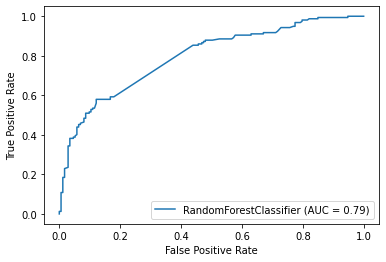

In [ ]:
plot_roc_curve(Rf_clf, X_test, y_test)

Finally, we will have a look at the classification report that shows us the precision, recall, and f1 score for the model.

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.27      0.41       173
           1       0.54      0.94      0.69       157

    accuracy                           0.59       330
   macro avg       0.69      0.61      0.55       330
weighted avg       0.70      0.59      0.54       330



Now, let us look at the count of keys in count_vect.

In [ ]:
len(count_vect.vocabulary_.keys())

1592

Let us create a bar plot for the "word frequencies" and "vocabulary". 

In [ ]:
word_frequencies = np.sum(X_counts.toarray(), axis=0)

In [ ]:
vocabulary = list(count_vect.vocabulary_.keys())

<BarContainer object of 1592 artists>

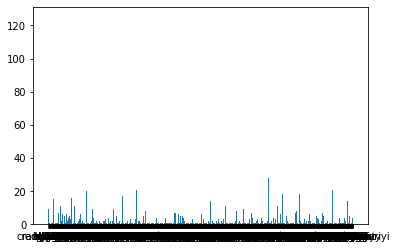

In [ ]:
plt.bar(vocabulary, word_frequencies)

### NRC Sentiment score

NRC Word-Emotion Association Lexicon (aka EmoLex) : The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive). 

In [ ]:
# Importing NRCLex : NRCLex will measure emotional affect from a body of text. 
# Affect dictionary contains approximately 27,000 words, and is based on the 
# National Research Council Canada (NRC) affect lexicon (see link below) 
# and the NLTK library's WordNet synonym sets.
from nrclex import NRCLex

Here, we are printing the reviews and top emotions.

In [ ]:
for review in reviews_data.Review.values:
    emotion = NRCLex(review)
    print(review, emotion.top_emotions)

wow love place [('positive', 0.5), ('joy', 0.5)]
crust good [('trust', 0.2), ('surprise', 0.2), ('positive', 0.2), ('joy', 0.2), ('anticipation', 0.2)]
tasti textur nasti [('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
stop late may bank holiday rick steve recommend love [('positive', 0.3)]
select menu great price [('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
get angri want damn pho [('anger', 0.3333333333333333), ('negative', 0.3333333333333333), ('disgust', 0.3333333333333333)]
honeslti didnt tast fresh [('fear', 0.0), ('anger', 0.0), ('anticip', 0.0), ('trust', 0.0), ('surprise', 0.0), ('positive', 0.0), ('negative', 0.0), ('sadness', 0.0), ('disgust', 0.0), ('joy', 0.0)]
potato like rubber could tell made ahead time kept warmer [('pos

In [ ]:
#Example
NRCLex('love').top_emotions

[('positive', 0.5), ('joy', 0.5)]

From above calculation we get the top emotions as 'positive ' and 'joy'.

### Please answer the questions below:




In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]
